Fichier DICOM trouvé : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Test_P_00038_RIGHT_CC/08-29-2017-DDSM-NA-28468/1.000000-full mammogram images-63304/1-1.dcm
Métadonnées du fichier DICOM :
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.170849841512906610322675042631332789876
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: S

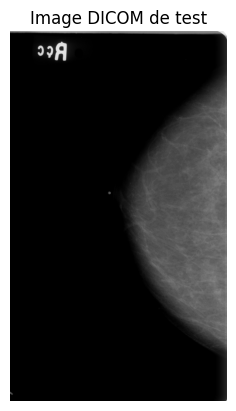

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt

# Chemin vers le dataset
data_path = "/Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Test_P_00038_RIGHT_CC/"

# Fonction pour parcourir les dossiers et trouver une image DICOM
def find_dicom_image(data_path):
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                return os.path.join(root, file)  # Retourne le chemin complet du premier fichier .dcm trouvé
    return None

# Trouver une image DICOM
dicom_file = find_dicom_image(data_path)

if dicom_file:
    print(f"Fichier DICOM trouvé : {dicom_file}")
    
    # Charger l'image DICO
    dicom_metadata = pydicom.dcmread(dicom_file)

    
    # affichage des métadonnées**
    print("Métadonnées du fichier DICOM :")
    print(dicom_metadata)

    # Extraction avec vérification si les attributs existent
    print("\nInformations spécifiques :")
    print(f"Patient ID : {getattr(dicom_metadata, 'PatientID', 'Non disponible')}")
    print(f"Study Date : {getattr(dicom_metadata, 'StudyDate', 'Non disponible')}")
    print(f"Modality : {getattr(dicom_metadata, 'Modality', 'Non disponible')}")
    print(f"Image Dimensions : {dicom_metadata.pixel_array.shape if hasattr(dicom_metadata, 'pixel_array') else 'Non disponible'}")
    print(f"Bits Stored : {getattr(dicom_metadata, 'BitsStored', 'Non disponible')}")
    print(f"Photometric Interpretation : {getattr(dicom_metadata, 'PhotometricInterpretation', 'Non disponible')}")

    
    # Afficher l'image
    plt.imshow(dicom_metadata.pixel_array, cmap="gray")
    plt.title("Image DICOM de test")
    plt.axis("off")
    plt.show()
else:
    print("Aucune image DICOM trouvée dans le dossier spécifié.")


In [4]:
import pandas as pd

def load_metadata_csvs(metadata_path):
    """Charge les fichiers CSV contenant des métadonnées et les combine en un seul DataFrame."""
    csv_files = [
        "calc_case_description_test_set.csv",
        "calc_case_description_train_set.csv",
        "mass_case_description_test_set.csv",
        "mass_case_description_train_set.csv"
    ]
    all_metadata = []
    for csv_file in csv_files:
        file_path = os.path.join(metadata_path, csv_file)
        try:
            data = pd.read_csv(file_path)
            all_metadata.append(data)
            print(f"Fichier chargé avec succès : {csv_file}")
        except Exception as e:
            print(f"Erreur lors du chargement de {csv_file} : {e}")
    return pd.concat(all_metadata, ignore_index=True)

load_metadata_csvs('/Volumes/SSD/Oncologie/P1-Classification/data/metadata/')


Fichier chargé avec succès : calc_case_description_test_set.csv
Fichier chargé avec succès : calc_case_description_train_set.csv
Fichier chargé avec succès : mass_case_description_test_set.csv
Fichier chargé avec succès : mass_case_description_train_set.csv


,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,breast_density,mass shape,mass margins
0,P_00038,2.0,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,NaN,NaN,NaN
1,P_00038,2.0,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,NaN,NaN,NaN
2,P_00038,2.0,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,NaN,NaN,NaN
3,P_00038,2.0,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,NaN,NaN,NaN
4,P_00038,2.0,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,P_02033,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,2.0,IRREGULAR,ILL_DEFINED
3564,P_02079,NaN,RIGHT,CC,1,mass,NaN,NaN,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,2.0,ROUND,SPICULATED
3565,P_02079,NaN,RIGHT,MLO,1,mass,NaN,NaN,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,2.0,ROUND,SPICULATED
3566,P_02092,NaN,LEFT,CC,1,mass,NaN,NaN,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,2.0,IRREGULAR,SPICULATED


2 fichiers DICOM trouvés.
Fichier DICOM trouvé : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Test_P_00038_RIGHT_CC_2/08-29-2017-DDSM-NA-67143/1.000000-ROI mask images-07570/1-1.dcm
Métadonnées du fichier DICOM :
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.35213579011325192420280764401298537255
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID       

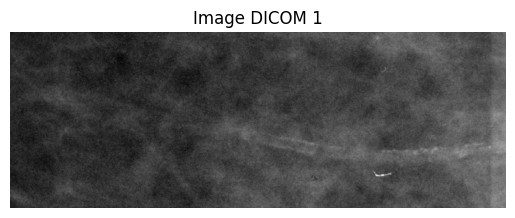

Fichier DICOM trouvé : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Test_P_00038_RIGHT_CC_2/08-29-2017-DDSM-NA-67143/1.000000-ROI mask images-07570/1-2.dcm
Métadonnées du fichier DICOM :
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.78292603612071192731970891644066239852
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Second

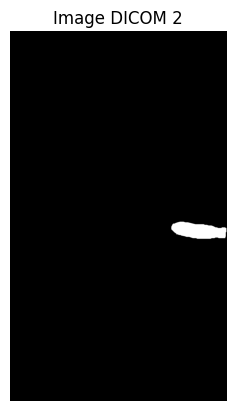

In [5]:
# Fonction pour trouver plusieurs fichiers DICOM
def find_multiple_dicom_images(data_path, max_files=5):
    dicom_files = []
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                dicom_files.append(os.path.join(root, file))
                if len(dicom_files) >= max_files:  # Limite au nombre maximum d'images
                    return dicom_files
    return dicom_files

# Trouver plusieurs fichiers DICOM
dicom_files = find_multiple_dicom_images(data_path, max_files=5)

if dicom_files:
    print(f"{len(dicom_files)} fichiers DICOM trouvés.")
    
    # Parcourir et afficher chaque image DICOM
    for i, dicom_file in enumerate(dicom_files, 1):
        print(f"Fichier DICOM trouvé : {dicom_file}")
        dicom_metadata = pydicom.dcmread(dicom_file)
    
        # affichage des métadonnées
        print("Métadonnées du fichier DICOM :")
        print(dicom_metadata)

        print("\nInformations spécifiques :")
        print(f"Patient ID : {dicom_metadata.PatientID}")
        print(f"Study Date : {dicom_metadata.StudyDate}")
        print(f"Modality : {dicom_metadata.Modality}")
        print(f"Image Dimensions : {dicom_metadata.pixel_array.shape}")
        print(f"Bits Stored : {dicom_metadata.BitsStored}")
        print(f"Photometric Interpretation : {dicom_metadata.PhotometricInterpretation}")
            
        # Afficher l'image
        plt.figure()
        plt.imshow(dicom_metadata.pixel_array, cmap="gray")
        plt.title(f"Image DICOM {i}")
        plt.axis("off")
        plt.show()
else:
    print("Aucune image DICOM trouvée.")


In [6]:
import os
import pydicom
import pandas as pd
import psutil  # Pour mesurer l'utilisation de la mémoire

# Fonction pour surveiller l'utilisation de la mémoire
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 ** 2)  # Convertir en Mo

# Fonction pour collecter les caractéristiques des images DICOM
def collect_image_metadata(data_path, max_files=10):
    metadata_list = []
    count = 0
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                dicom_path = os.path.join(root, file)
                dicom_metadata = pydicom.dcmread(dicom_path, force=True)
                try:
                    # Extraire les caractéristiques clés
                    metadata_list.append({
                        "File": dicom_path,
                        "Patient ID": getattr(dicom_metadata, "PatientID", "Non disponible"),
                        "Study Date": getattr(dicom_metadata, "StudyDate", "Non disponible"),
                        "Modality": getattr(dicom_metadata, "Modality", "Non disponible"),
                        "Image Dimensions": dicom_metadata.pixel_array.shape if hasattr(dicom_metadata, 'pixel_array') else "Non disponible",
                        "Bits Stored": getattr(dicom_metadata, "BitsStored", "Non disponible"),
                        "Photometric Interpretation": getattr(dicom_metadata, "PhotometricInterpretation", "Non disponible")
                    })
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier {dicom_path}: {e}")
                
                count += 1
                if count >= max_files:
                    # On retourne immédiatement le DataFrame après avoir atteint la limite
                    return pd.DataFrame(metadata_list)
    return pd.DataFrame(metadata_list)

# Chemin vers le dataset
data_path = "/Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM"

# Configurer pandas pour afficher toutes les informations des colonnes
pd.set_option('display.max_colwidth', None)  # Afficher les colonnes complètes
pd.set_option('display.max_rows', None)  # Afficher toutes les lignes si nécessaire

# Mesurer la mémoire avant la collecte
print(f"Utilisation mémoire initiale : {memory_usage():.2f} Mo")

# Collecter les métadonnées de plusieurs images
image_metadata = collect_image_metadata(data_path, max_files=11)  # Modifie max_files si nécessaire

# Mesurer la mémoire après la collecte
print(f"Utilisation mémoire après collecte : {memory_usage():.2f} Mo")

# Afficher toutes les données collectées
print(image_metadata)


Utilisation mémoire initiale : 141.84 Mo
Utilisation mémoire après collecte : 236.06 Mo
                                                                                                                                                                                             File  \
0    /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Test_P_00038_LEFT_CC/08-29-2017-DDSM-NA-96009/1.000000-full mammogram images-63992/1-1.dcm   
1   /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Test_P_00038_LEFT_MLO/08-29-2017-DDSM-NA-17613/1.000000-full mammogram images-97934/1-1.dcm   
2        /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Test_P_00038_LEFT_CC_1/08-29-2017-DDSM-NA-94942/1.000000-ROI mask images-18515/1-1.dcm   
3        /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Test_P_00038_LEFT

In [7]:
def extract_dicom_metadata(dicom_data):
    """Extrait les métadonnées d'un fichier DICOM en dictionnaire."""
    return {
        "Patient ID": getattr(dicom_data, "PatientID", "Non disponible"),
        "Study Date": getattr(dicom_data, "StudyDate", "Non disponible"),
        "Modality": getattr(dicom_data, "Modality", "Non disponible"),
        "Image Dimensions": dicom_data.pixel_array.shape if hasattr(dicom_data, "pixel_array") else "Non disponible",
        "Bits Stored": getattr(dicom_data, "BitsStored", "Non disponible"),
        "Photometric Interpretation": getattr(dicom_data, "PhotometricInterpretation", "Non disponible")
    }
extract_dicom_metadata(dicom_metadata)

metadata_list = []
max_files = 20  # Limiter à 100 fichiers pour accélérer

for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".dcm"):
            dicom_path = os.path.join(root, file)
            dicom_data = pydicom.dcmread(dicom_path, force=True)
            try:
                metadata_list.append(extract_dicom_metadata(dicom_data))
            except Exception as e:
                print(f"Erreur lors de l'extraction des métadonnées pour {dicom_path}: {e}")

            if len(metadata_list) >= max_files:  # Arrêter après `max_files`
                break
    if len(metadata_list) >= max_files:
        break

dicom_metadata_df = pd.DataFrame(metadata_list)


print("Colonnes dans dicom_metadata_df :")
print(dicom_metadata_df.columns)
print("\nAperçu des métadonnées DICOM :")
print(dicom_metadata_df)

# Chargement des métadonnées CSV
csv_path = "/Volumes/SSD/Oncologie/P1-Classification/data/metadata"
csv_files = ["calc_case_description_test_set.csv", "calc_case_description_train_set.csv", 
             "mass_case_description_test_set.csv", "mass_case_description_train_set.csv"]

csv_metadata = pd.concat(
    [pd.read_csv(os.path.join(csv_path, file)) for file in csv_files],
    ignore_index=True
)

# Harmoniser les colonnes de dicom_metadata_df
dicom_metadata_df.columns = (
    dicom_metadata_df.columns.str.lower()  # Convertir en minuscules
    .str.replace(" ", "_")                 # Remplacer les espaces par des underscores
)

# Renommer spécifiquement "patient id" en "patient_id" pour éviter tout problème
dicom_metadata_df = dicom_metadata_df.rename(columns={"patient_id": "patient_id"})

# Harmoniser les colonnes de csv_metadata
csv_metadata.columns = (
    csv_metadata.columns.str.lower()  # Convertir en minuscules
    .str.replace(" ", "_")            # Remplacer les espaces par des underscores
)

# Vérifier les colonnes harmonisées
print("Colonnes harmonisées de dicom_metadata_df :", dicom_metadata_df.columns)
print("Colonnes harmonisées de csv_metadata :", csv_metadata.columns)

# Réaliser le merge après harmonisation
merged_metadata = pd.merge(dicom_metadata_df, csv_metadata, how="left", on="patient_id")

# Afficher un aperçu des données fusionnées
print("\nAperçu des métadonnées fusionnées :")
print(merged_metadata.head())


Colonnes dans dicom_metadata_df :
Index(['Patient ID', 'Study Date', 'Modality', 'Image Dimensions',
       'Bits Stored', 'Photometric Interpretation'],
      dtype='object')

Aperçu des métadonnées DICOM :
                       Patient ID Study Date Modality Image Dimensions  \
0             P_00038_LEFT_CC.dcm                  MG     (4616, 3016)   
1            P_00038_LEFT_MLO.dcm                  MG     (4728, 3064)   
2     Calc-Test_P_00038_LEFT_CC_1   20170829       MG       (249, 265)   
3           P_00038_LEFT_CC_1.dcm                  MG     (4616, 3016)   
4    Calc-Test_P_00038_LEFT_MLO_1   20170829       MG       (265, 249)   
5          P_00038_LEFT_MLO_1.dcm                  MG     (4728, 3064)   
6            P_00038_RIGHT_CC.dcm                  MG     (4688, 2744)   
7    Calc-Test_P_00038_RIGHT_CC_1   20170829       MG       (409, 660)   
8          P_00038_RIGHT_CC_1.dcm                  MG     (4688, 2744)   
9    Calc-Test_P_00038_RIGHT_CC_2   20170829       M